In [1]:
import pandas as pd

## Reading csvs

In [10]:
lead_details = pd.read_csv('leads_basic_details.csv')
demo_watch = pd.read_csv('leads_demo_watched_details.csv')
lead_interaction = pd.read_csv('leads_interaction_details.csv')
no_interest_reason = pd.read_csv('leads_reasons_for_no_interest.csv')
assigned_managers = pd.read_csv('sales_managers_assigned_leads_details.csv')

## Reading data

In [83]:
lead_details.head(5)

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


In [13]:
demo_watch.head(5)

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


In [14]:
lead_interaction.head(5)

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [15]:
no_interest_reason.head(5)

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


In [17]:
assigned_managers.head(5)

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


## finiding and handling null values


In [23]:
lead_details.isnull().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

In [24]:
demo_watch.isnull().sum()

lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

In [26]:
lead_interaction.isnull().sum()

jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

In [27]:
assigned_managers.isna().sum()

snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64

In [25]:
no_interest_reason.isnull().sum()

lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64

### No_interest_reason has three different columns and we have given reason of why lead drop off on a specific stage. As in each row only one column has value, we can get drop off stage and the reason why they drop off. so first I will get these two columns and drop original three columns as I don't need it

In [33]:
def get_stage_reason(row):
    if pd.notna(row['reasons_for_not_interested_to_convert']):
        return 'convert', row['reasons_for_not_interested_to_convert']
    elif pd.notna(row['reasons_for_not_interested_to_consider']):
        return 'consider', row['reasons_for_not_interested_to_consider']
    elif pd.notna(row['reasons_for_not_interested_in_demo']):
        return 'demo', row['reasons_for_not_interested_in_demo']
    else:
        return 'progressed or no info', None

# Apply the function
no_interest_reason[['drop_off_stage', 'drop_off_reason']] = no_interest_reason.apply(
    lambda row: pd.Series(get_stage_reason(row)), axis=1
)

# Now drop the original 3 reason columns
no_interest_reason.drop([
    'reasons_for_not_interested_in_demo',
    'reasons_for_not_interested_to_consider',
    'reasons_for_not_interested_to_convert'
], axis=1, inplace=True)



### I have observed that some has given vlues as 'cannot afford' or 'can't afford'. these two values are same. so I changed it to one value by replacing other

In [38]:
no_interest_reason['drop_off_reason'] = no_interest_reason['drop_off_reason'].replace('Can\'t afford','Cannot afford')

In [39]:
no_interest_reason['drop_off_reason'].unique()

array(['No time for student', 'Wants offline classes', 'Cannot afford',
       'Student not interested in domain', 'Will join in final year'],
      dtype=object)

In [46]:
no_interest_reason.isna().sum()

lead_id            0
drop_off_stage     0
drop_off_reason    0
dtype: int64

## finding duplicates: Only lead_interaction has duplicates and it is due to same values. there not entire row that is duplicated

In [84]:
lead_details.duplicated().sum()

0

In [51]:
lead_interaction.duplicated().sum()

438

In [52]:
demo_watch.duplicated().sum()

0

In [53]:
assigned_managers.duplicated().sum()

0

In [54]:
no_interest_reason.duplicated().sum()

0

## Checking for outliers

In [62]:
lead_interaction.describe()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
count,2192,2192,2192,2192,2192,2192
unique,16,358,4,40,2,8
top,JNR1012MG,USR1193,lead,1/8/2022,successful,demo_not_attended
freq,164,11,1547,156,1866,701


In [64]:
assigned_managers.describe()

,cycle
count,360.000000
mean,2.469444
std,1.124139
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [65]:
no_interest_reason.describe()

,lead_id,drop_off_stage,drop_off_reason
count,294,294,294
unique,294,3,5
top,USR1001,demo,Cannot afford
freq,1,164,99


In [85]:
lead_details.describe() #here max value is 211 which is unusual. need to look into it

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


## finding outliers for lead_details

<Axes: xlabel='age'>

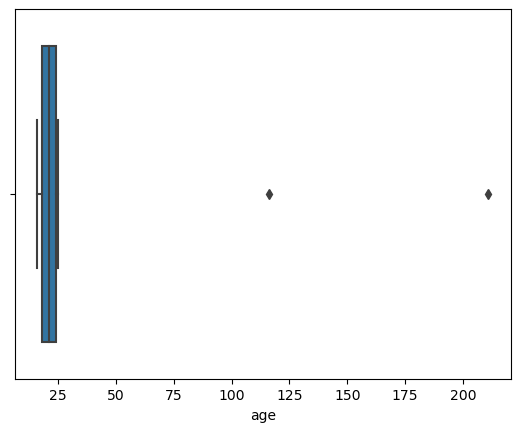

In [86]:
import seaborn as sns
sns.boxplot(x=lead_details['age'])

In [87]:
# IQR method
Q1 = lead_details['age'].quantile(0.25)
Q3 = lead_details['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier rows
outlier_rows = lead_details[(lead_details['age'] < lower_bound) | (lead_details['age'] > upper_bound)]

# Display them
print(f"Outlier rows: {len(outlier_rows)}")
display(outlier_rows)



Outlier rows: 2


,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


As there are only two outliers and age look unrealistic, will remove it

In [88]:
lead_details = lead_details[lead_details['age']<100]

<Axes: xlabel='age'>

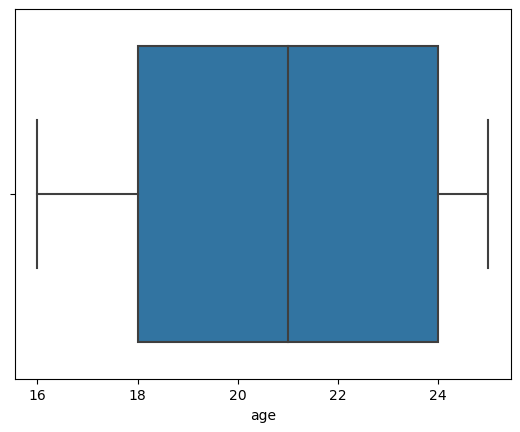

In [98]:
import seaborn as sns
sns.boxplot(x=lead_details['age'])

## finding outliers for demo_watch

In [91]:
demo_watch.describe() # percentage 510 is unusual. need to look into it

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


<Axes: xlabel='watched_percentage'>

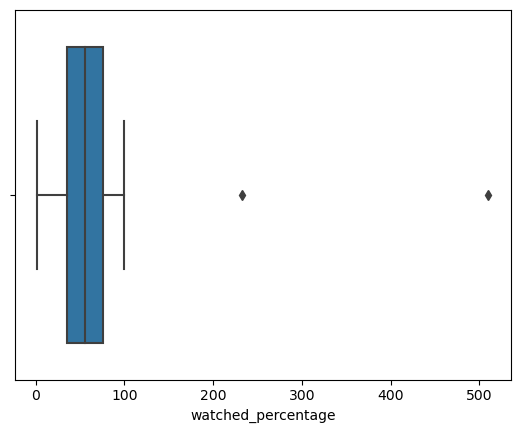

In [92]:
import seaborn as sns
sns.boxplot(x=demo_watch['watched_percentage'])

In [95]:
# IQR method
Q1 = demo_watch['watched_percentage'].quantile(0.25)
Q3 = demo_watch['watched_percentage'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier rows
outlier_rows = demo_watch[(demo_watch['watched_percentage']< lower_bound) | (demo_watch['watched_percentage'] > upper_bound)]

# Display them
print(f"Outlier rows: {len(outlier_rows)}")
display(outlier_rows)


Outlier rows: 2


,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


As there are only two outliers in watched_percentage and look unrealistic, will remove it

In [96]:
demo_watch = demo_watch[demo_watch['watched_percentage'] < 100]

<Axes: xlabel='watched_percentage'>

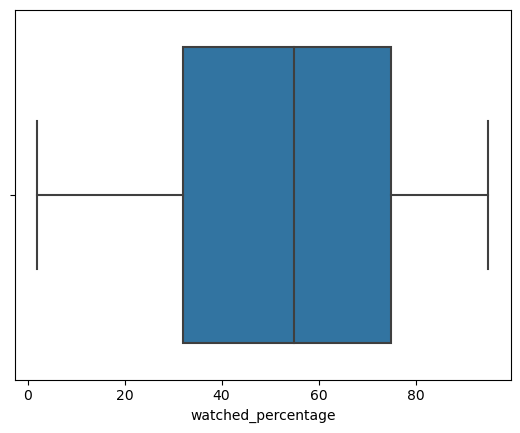

In [97]:
import seaborn as sns
sns.boxplot(x=demo_watch['watched_percentage'])

## Analyse data in sql

In [99]:
pip install pyodbc sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [100]:
#connection to SQL server
import pyodbc
from sqlalchemy import create_engine
import urllib

server = 'ASIF-LAPTOP\SQLEXPRESS02'       
database = 'edtech'     
# Build connection string
params = urllib.parse.quote_plus(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"  # or use UID/PWD if SQL Auth
)

# Create SQLAlchemy engine
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")


Load Dataframes as table in sql

In [114]:
# List of dataframes and corresponding table names
tables = {
    'lead_details': lead_details,
    'demo_watch': demo_watch,
    'lead_interaction': lead_interaction,
    'lead_dropoff_info': no_interest_reason,
    'assigned_managers' : assigned_managers
    
}


# Load each DataFrame to SQL
for table_name, df in tables.items():
    df.to_sql(table_name, con=engine, if_exists='append', index=False)
    print(f"DataFrame loaded into SQL table: {table_name}")
    

DataFrame loaded into SQL table: lead_details
DataFrame loaded into SQL table: demo_watch
DataFrame loaded into SQL table: lead_interaction
DataFrame loaded into SQL table: lead_dropoff_info
